# Baseline ML Modeling with Logistic Regression and TF-IDF

This notebook demonstrates the baseline process for author classification using logistic regression and TF-IDF. It includes data preprocessing, model training, and evaluation.

## Logistic Regression as a Semantic Classifier

Logistic Regression can be used for both regression and classification tasks. This baseline model works under the assumption that different authors leverage a different lexicon, so when we measure the most common relevant words in the given texts, there will be different patters associated with different authors. 

The idea is that if our baseline Logistic Classifier can achieve a 70-80% recall and precision, then our hypothesis has promise and a more mature model will be able to better classify these texts.

## Intuition and Limitations

Many fiction authors have their own distinctive style and genres.  A passage from J.R.R. Tolkien is likely going to sound different than a passage from Frank Herbert.  So given that we can quantify some of these semantic patterns, even crudely by term frequency, we can see if that hypothesis is true of our data set.

One limitation of this approach is that it only works for larger and more stylistic passages.  Of these two examples from Tolkien, one is clearly distinctively Tolkien:
> The Black Rider flung back his hood, and behold! he had a kingly crown; and yet upon no head visible was it set. The red fires shone between it and the mantled shoulders vast and dark. From a mouth unseen there came a deadly laughter.
'Old fool!' he said. 'Old fool! This is my hour. Do you not know Death when you see it? Die now and curse in vain!' And with that he lifted high his sword and flames ran down the blade.  **Return of the King**, _The Siege of Gondor_

> "Noon?" said Sam, trying to calculate.  "Noon of what day?"  **Return of the King**, _The Field of Cormallen_



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from src.utils.helpers import classification_report_to_df

,precision,recall,f1-score,support
0,0.97,0.98,0.98,4249
1,0.98,0.97,0.98,4697
accuracy,0.98,0.98,0.98,0
macro avg,0.98,0.98,0.98,8946
weighted avg,0.98,0.98,0.98,8946


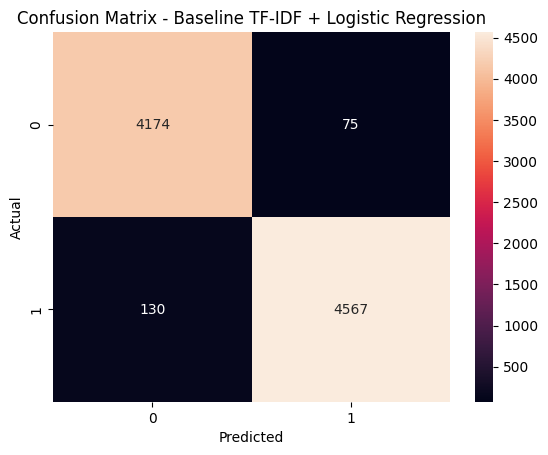

In [3]:
# Load your pre-cleaned dataset
df = pd.read_csv('../data/raw/initial_data.csv')

# Split data
X = df['text']
y = df['is_bs']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000, solver='lbfgs'))  # binary: no need for multi_class
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
display(classification_report_to_df(y_test, y_pred))

# Optional: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title('Confusion Matrix - Baseline TF-IDF + Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
# Get feature names from the TF-IDF vectorizer
feature_names = pipeline.named_steps['tfidf'].get_feature_names_out()

# Get model coefficients
coefficients = pipeline.named_steps['clf'].coef_[0]

# Create DataFrame of terms and weights
coef_df = pd.DataFrame({
    'term': feature_names,
    'weight': coefficients
})

# Sort by influence
top_fake_terms = coef_df.sort_values(by='weight', ascending=False).head(30)
top_real_terms = coef_df.sort_values(by='weight', ascending=True).head(30)

# Display top terms
print("🔴 Terms most indicative of FAKE news:")
display(top_fake_terms)

print("\n🟢 Terms most indicative of REAL news:")
display(top_real_terms)

🔴 Terms most indicative of FAKE news:


,term,weight
9315,via,10.208567
8541,this,6.525271
6519,read more,5.931965
6518,read,5.089995
5238,mr,4.932412
7824,that,4.876659
4371,just,4.835780
4132,is,4.616092
1676,com,4.259540
9957,you,4.020999



🟢 Terms most indicative of REAL news:


,term,weight
6923,said,-17.240391
5655,on,-9.787775
6945,said on,-9.265083
5712,on wednesday,-6.245484
5710,on tuesday,-6.091734
5706,on thursday,-5.646214
5670,on friday,-5.621967
5686,on monday,-5.112453
8978,told,-4.782858
5124,minister,-4.623880


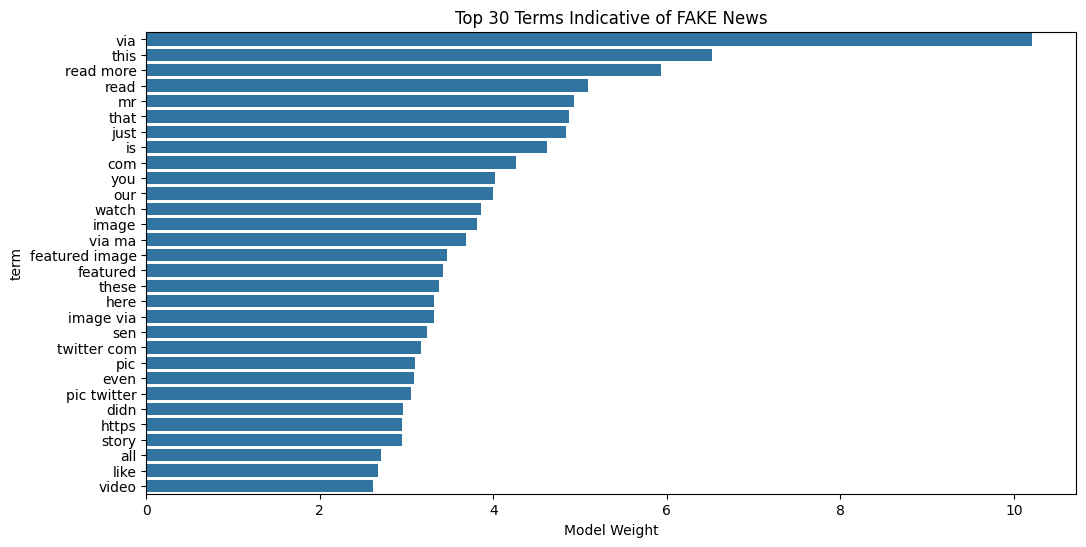

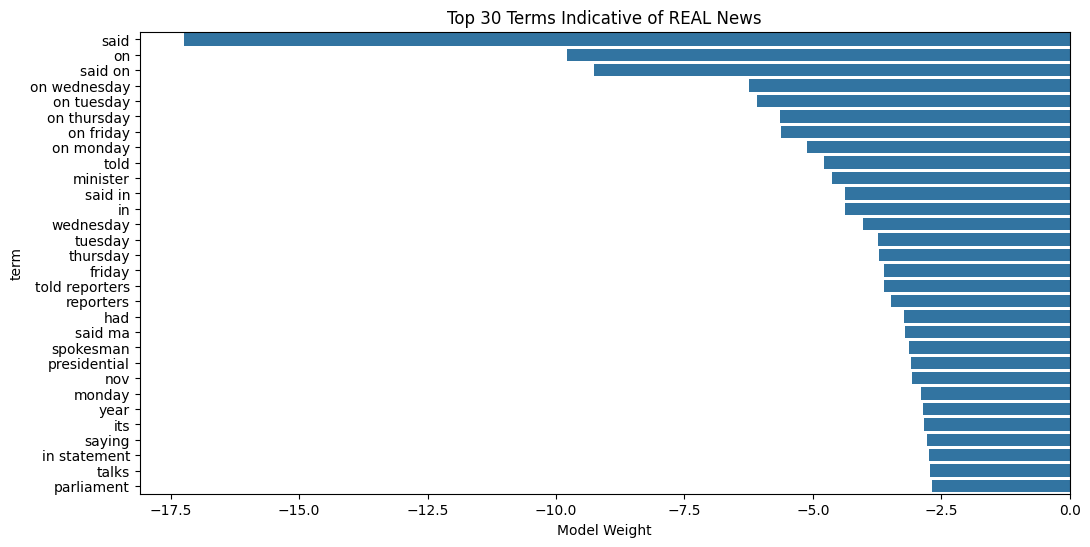

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='weight', y='term', data=top_fake_terms)
plt.title('Top 30 Terms Indicative of FAKE News')
plt.xlabel('Model Weight')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='weight', y='term', data=top_real_terms)
plt.title('Top 30 Terms Indicative of REAL News')
plt.xlabel('Model Weight')
plt.show()
